In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('data/Boston-house-price-data.csv')

In [12]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [8]:
from sklearn.cluster import KMeans
import numpy as np

def cluster_kmeans(data, k, returns='labels', state=None):
  '''
  data:     n x m - matrix of input data (n observations, m features)
  k:        number of clusters
  returns:  'estimator' returns fitted estimator, 
            'labeled' returns labeled data matrix, 
            'labels' returns labels-array only (default)
  state:    random initialization (default 'None')
  '''

  estimator_fit = KMeans(n_clusters=k, random_state=state).fit(data)

  if returns == 'labels':
    return estimator_fit.labels_
  elif returns == 'labeled':
    return np.c_[data, estimator_fit.labels_]
  else:
    return estimator_fit

In [21]:
from dunn import dunn_fast
def get_indices(data, labels):
  '''
  data:     n x m matrix of data (n observations, m features)
  labels:   list of n cluster labels
  '''
  indices = pd.DataFrame(columns=['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn'])
      
  ch = metrics.calinski_harabasz_score(data, labels)
  db = metrics.davies_bouldin_score(data, labels)
  si = metrics.silhouette_score(data, labels)
  dn = dunn_fast(data, labels)

  indices = indices.append({'Calinski-Harabasz': ch,
                            'Davies-Bouldin': db,
                            'Silhouette': si,
                            'Dunn': dn}, 
                            ignore_index=True)

  return indices

In [14]:
def get_all_indices(algorithm, data, parameter_range):
    '''
    algorithm:        the function performing clustering, taking data, one parameter
                      and only default parameters, returning list of labels
    data:             n x m matrix of data (n observations, m features)
    parameter_range:  list of values to iterate over
    '''

    indices_list = []
    indices_df =  pd.DataFrame(columns=['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn'])
    
    for p in parameter_range:
        try:
            indices_list.append(get_indices(data, algorithm(data, p, returns='labels')))
        except Exception:
            indices_list.append(pd.DataFrame(data={'Calinski-Harabasz': [0], 'Davies-Bouldin': [0], 'Silhouette': [0], 'Dunn': [0]}))
        
    indices_df = pd.concat(indices_list).reset_index(drop=True)
    indices_df['Parameter'] = parameter_range
        
    return indices_df

In [13]:
def plot_indices(indices, title='Indices', parameter='Parameter', size=(10,7), returns='plot'):
    '''
    indices:      dataframe containing CH, DB, S, D index, Parameter (p x 5 matrix)
    title:        title for the plot (default '')
    parameter:    name of parameter
    size:         size-tuple for the plot (width, height) in inches (default (12,12))
    returns:      'plot' returns nothing and just plots
                'fig' returns figure object
    '''

    x = np.array(indices[['Parameter']])
    Y = np.array(indices[['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn']])

    fig = plt.figure(figsize=size)
    fig.suptitle(title)

    linewidth = 1.5

    ax = fig.add_subplot(2,1,1)
    ax.plot(x, Y[:, 0], label='Calinski-Harabasz', color='r', linestyle='dotted', linewidth=linewidth)
    ax.legend(loc=4)
    ax.set_ylabel('Index value')

    ax = fig.add_subplot(2,1,2)
    ax.plot(x, Y[:, 1], label='Davies-Bouldin', linestyle='solid', linewidth=linewidth)
    ax.plot(x, Y[:, 2], label='Silhouette', linestyle='dashdot', linewidth=linewidth)
    ax.plot(x, Y[:, 3], label='Dunn', linestyle='dashed', linewidth=linewidth)
    ax.legend(loc=4)
    ax.set_xlabel(parameter)
    ax.set_ylabel('Index value')

    if returns == 'plot':
        plt.show()
    else:
        return fig

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(housing)

In [16]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
get_all_indices(cluster_kmeans, housing, [n for n in range(2, 10)])

Calinski-Harabasz  Davies-Bouldin  Silhouette      Dunn  Parameter
0        1192.122456        0.545989    0.689200  0.524841          2
1        1338.647777        0.326123    0.720653  0.104212          3
2        1621.895947        0.579491    0.562670  0.059782          4
3        1521.512654        0.587930    0.565347  0.071290          5
4        1561.634685        0.737102    0.494004  0.110962          6
5        1545.820311        0.757006    0.499435  0.067635          7
6        1498.595808        0.794608    0.451413  0.071626          8
7        1475.531123        0.769173    0.461722  0.049754          9

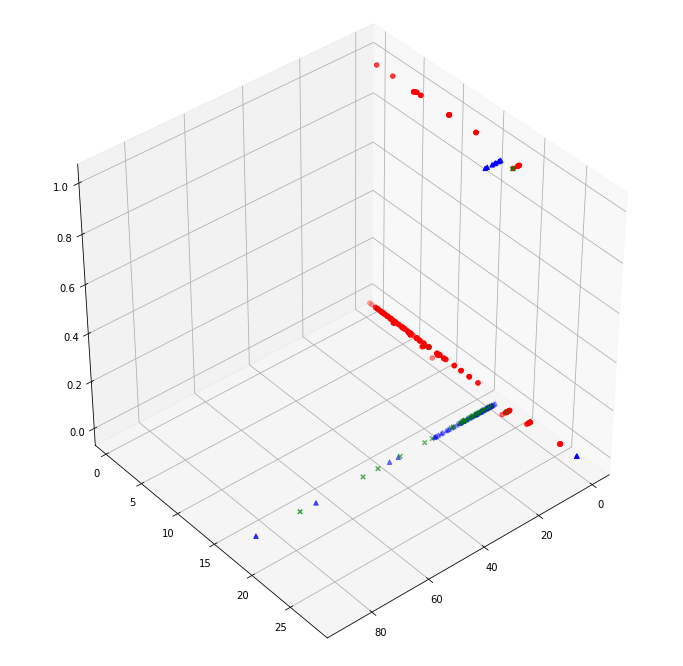

In [26]:
# what does it look like?
# first combine data and labels

def plot_data_3d(n):
    '''n :  number of clusters'''
    labeled_data = np.c_[housing, kmeans.labels_]

    fig = plt.figure(figsize=(12, 12))

    # show first angle
    ax = fig.add_subplot(111, projection='3d', azim=50, elev=40)

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:n]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 2]
        zs = labeled_data[labeled_data[:,-1] == l][:, 3]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    # ax.set_xlabel(customers[['gender', 'income', 'spending_score']].columns[0])
    # ax.set_ylabel(customers[['gender', 'income', 'spending_score']].columns[1])
    # ax.set_zlabel(customers[['gender', 'income', 'spending_score']].columns[2])
    ax.set_title('')

    plt.show()
    
plot_data_3d(3)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
housing_pca = pca.fit_transform(housing)

In [36]:
get_all_indices(cluster_kmeans, housing_pca, [n for n in range(2, 10)])

Calinski-Harabasz  Davies-Bouldin  Silhouette      Dunn  Parameter
0        1239.098358        0.530731    0.702896  0.503436          2
1        1441.431045        0.303578    0.737887  0.090659          3
2        1839.611618        0.529675    0.597387  0.056295          4
3        1778.265968        0.547002    0.600578  0.048030          5
4        1909.818517        0.651890    0.540372  0.065125          6
5        1961.590124        0.651738    0.552924  0.031553          7
6        1969.296914        0.674447    0.516424  0.030227          8
7        1984.276163        0.705316    0.506512  0.013397          9

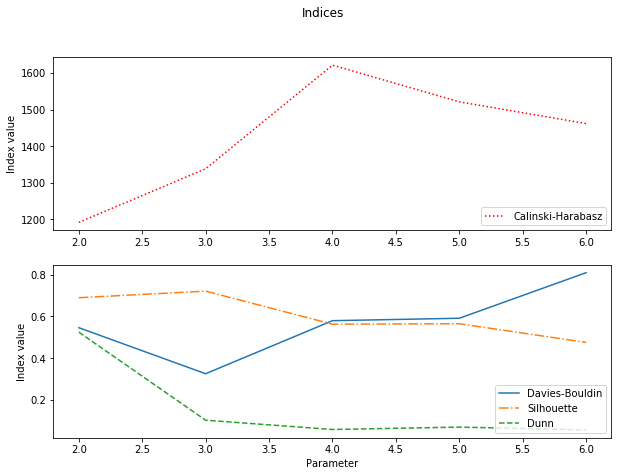

In [40]:
plot_indices(get_all_indices(cluster_kmeans, housing, [n for n in range(2, 7)]))

In [60]:
from sklearn.manifold import TSNE
def tsne_transform(data, state=None):
  '''
  data:     n x m matrix of data (n observations, m features)
  state:    random initialization (default None)
  '''

  return TSNE(n_components=2, random_state=state).fit_transform(data)

In [51]:
housing_tsne_3 = tsne_transform(housing, state=0)

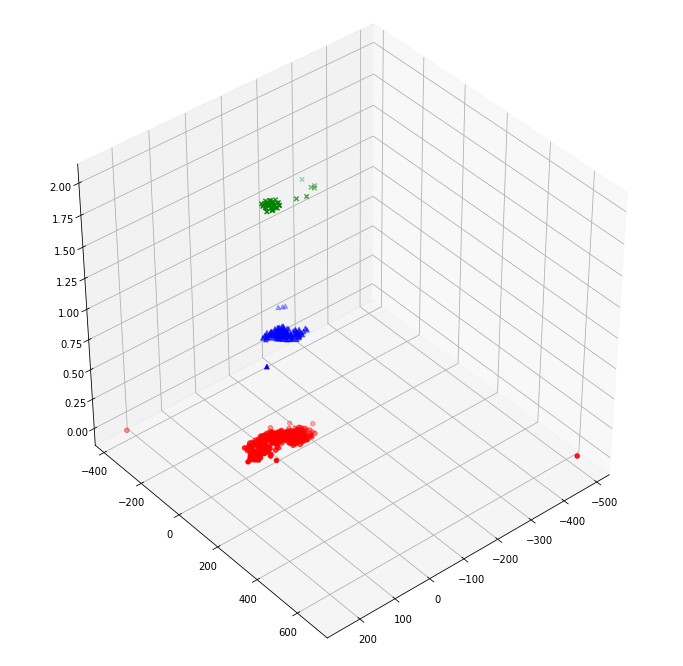

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(housing)
def plot_data_3d(n):
    '''n :  number of clusters'''
    labeled_data = np.c_[housing_tsne_3, kmeans.labels_]

    fig = plt.figure(figsize=(12, 12))

    # show first angle
    ax = fig.add_subplot(111, projection='3d', azim=50, elev=40)

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:n]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 2]
        zs = labeled_data[labeled_data[:,-1] == l][:, 3]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    # ax.set_xlabel(customers[['gender', 'income', 'spending_score']].columns[0])
    # ax.set_ylabel(customers[['gender', 'income', 'spending_score']].columns[1])
    # ax.set_zlabel(customers[['gender', 'income', 'spending_score']].columns[2])
    ax.set_title('')

    plt.show()
    
plot_data_3d(6)

In [61]:
housing_tsne_2 = tsne_transform(housing, state=0)

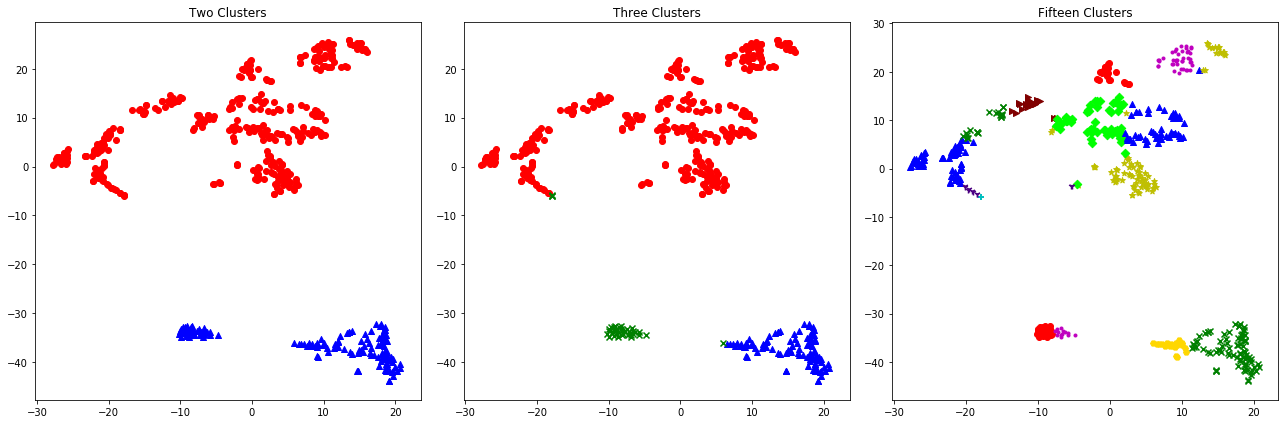

In [76]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(housing)
plot_tsne_2d(housing_tsne_2, kmeans.labels_)

In [75]:
clusters = [
  ('r', 'o', 0), 
  ('b', '^', 1), 
  ('g', 'x', 2), 
  ('m', '.', 3), 
  ('y', '*', 4), 
  ('c', '+', 5),
  ('maroon', '>', 6),
  ('lime', 'D', 7),
  ('gold', 'H', 8),
  ('indigo', '1', 9),
  ('aquamarine', 'v', 10),
]

def plot_tsne_2d(data, labels, title='', size=(18, 6), state=None, returns='plot'):
  '''
  data:     n x m matrix of data (n observations, m features)
  labels:   label array for all observations
  title:    title for the plot (default '')
  size:     size-tuple for the plot (width, height) in inches (default (12,12))
  state:    random initialization (default None)
  returns:  'plot' returns nothing and just plots
            'fig' returns figure object
  '''

  # data_projected_2d = TSNE(n_components=2, random_state=state).fit_transform(data)

  kmeans = KMeans(n_clusters=2, random_state=0).fit(housing)
  labeled_data = np.c_[data, kmeans.labels_]

  fig = plt.figure(figsize=size)
  ax = fig.add_subplot(131)

  # number of clusters
  n = len(set(labels))

  # adds seperate scatter for each cluster 
  for i in range(n):
    color, marker, _ = clusters[i % 10] # if more than 11 clusters, will wrap
    current_cluster = labeled_data[labeled_data[:,-1] == i]

    ax.scatter(
      current_cluster[:, 0], 
      current_cluster[:, 1], 
      c=color, 
      marker=marker
    )

  ax.set_title('Two Clusters')

  kmeans = KMeans(n_clusters=3, random_state=0).fit(housing)
  labeled_data = np.c_[data, kmeans.labels_]

  ax = fig.add_subplot(132)

  # number of clusters
  n = len(set(labels))

  # adds seperate scatter for each cluster 
  for i in range(n):
    color, marker, _ = clusters[i % 10] # if more than 11 clusters, will wrap
    current_cluster = labeled_data[labeled_data[:,-1] == i]

    ax.scatter(
      current_cluster[:, 0], 
      current_cluster[:, 1], 
      c=color, 
      marker=marker
    )

  ax.set_title('Three Clusters')

  kmeans = KMeans(n_clusters=15, random_state=0).fit(housing)
  labeled_data = np.c_[data, kmeans.labels_]

  ax = fig.add_subplot(133)

  # number of clusters
  n = len(set(labels))

  # adds seperate scatter for each cluster 
  for i in range(n):
    color, marker, _ = clusters[i % 10] # if more than 11 clusters, will wrap
    current_cluster = labeled_data[labeled_data[:,-1] == i]

    ax.scatter(
      current_cluster[:, 0], 
      current_cluster[:, 1], 
      c=color, 
      marker=marker
    )

  ax.set_title('Fifteen Clusters')

  fig.tight_layout()

  if returns == 'plot':
    plt.savefig('kmeans_housing_tsne.pdf')
    #plt.show()
  else:
    return fig